# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


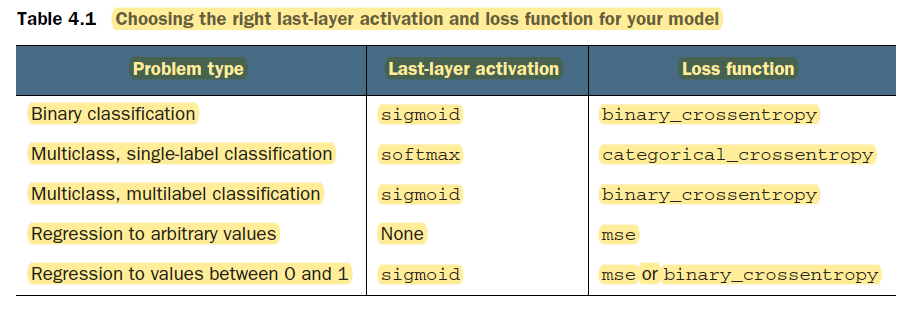

# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
credit_df = pd.read_csv('creditcard.csv')

In [3]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# check how many categories present in each Column
cat_list = []
count = 0
for col in credit_df.columns:
    if credit_df[col].dtype == 'O' and col != 'Class':
        print(len(credit_df[col].unique())," lablels in ",col)
        cat_list.append(col)
        count += len(credit_df[col].unique())

count

0

# Correlation

<AxesSubplot:>

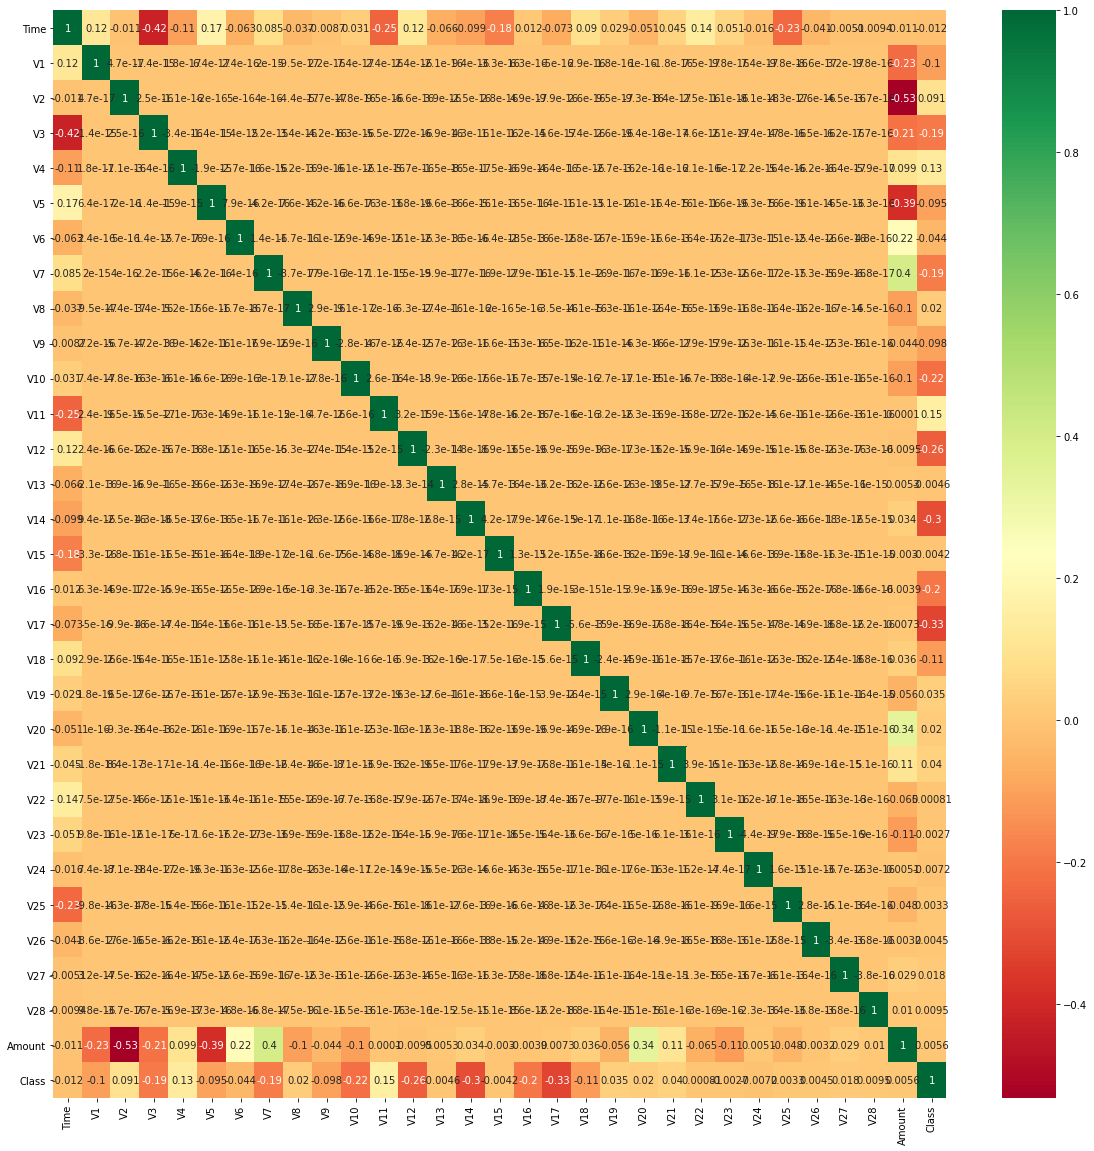

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(),annot=True,cmap="RdYlGn")

In [7]:
credit_df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

# Select Features with High Corelation

In [8]:
credit = credit_df[['V11','V4','V7','V3','V16','V10','V12','V14','V17','Class']]

In [9]:
credit.head()

,V11,V4,V7,V3,V16,V10,V12,V14,V17,Class
0,-0.551600,1.378155,0.239599,2.536347,-0.470401,0.090794,-0.617801,-0.311169,0.207971,0
1,1.612727,0.448154,-0.078803,0.166480,0.463917,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.624501,0.379780,0.791461,1.773209,-2.890083,0.207643,0.066084,-0.165946,1.109969,0
3,-0.226487,-0.863291,0.237609,1.792993,-1.059647,-0.054952,0.178228,-0.287924,-0.684093,0
4,-0.822843,0.403034,0.592941,1.548718,-0.451449,0.753074,0.538196,-1.119670,-0.237033,0


array([[<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

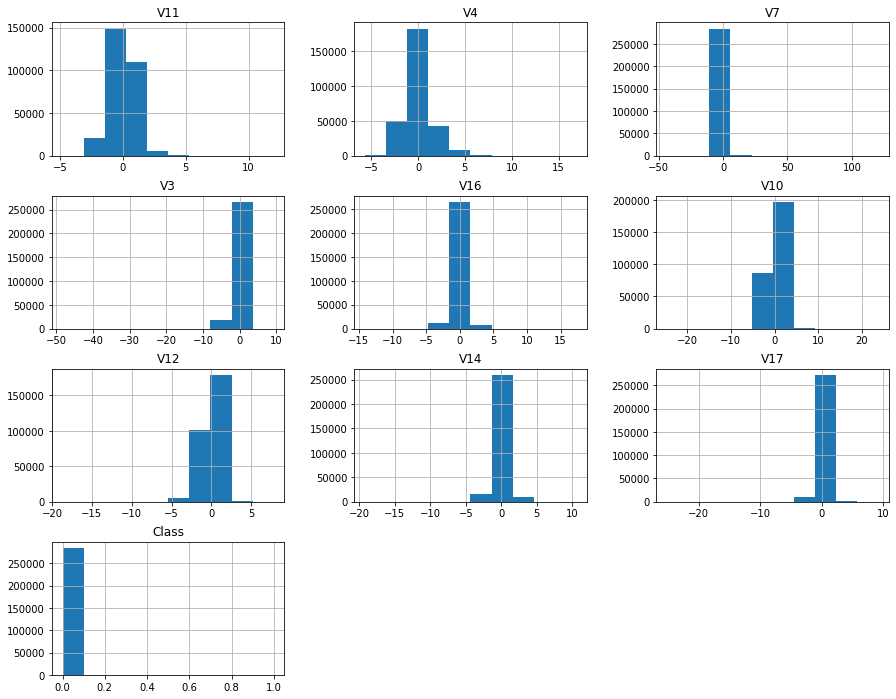

In [10]:
credit.hist(figsize=(15,12))

In [11]:
credit['Class'].unique()

array([0, 1], dtype=int64)

In [12]:
credit[credit['Class'] == 1].Class.count()

492

In [13]:
credit[credit['Class'] == 0].Class.count()

284315

# Cater Imbalanced Class column via OverSampling

In [14]:
x = (credit.loc[:, credit.columns != 'Class'])
y = (credit.loc[:, credit.columns == 'Class'])

In [15]:
x.shape

(284807, 9)

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [18]:
x_over, y_over = oversample.fit_resample(x, y)

In [19]:
x_over.shape

(568630, 9)

Text(0.5, 1.0, 'After')

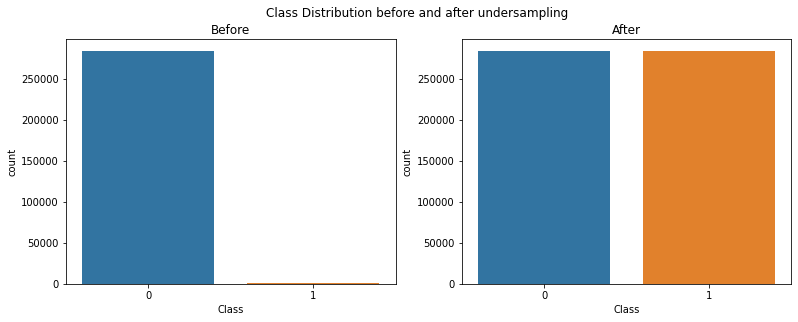

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit, ax=axs[0])
sns.countplot(x="Class", data=y_over, ax=axs[1])

fig.suptitle("Class Distribution before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

# Split Data

In [1]:
from sklearn.model_selection import train_test_split

In [22]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=1)  # chnaged from 42

# Split 15% Test into further 30% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(398041, 9)
(85294, 9)
(85295, 9)


In [24]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(398041, 1)
(85294, 1)
(85295, 1)


# Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [27]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.transform(x_test)
x_val_s = min_max_scaler.transform(x_val)

In [28]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(398041, 9)
(85294, 9)
(85295, 9)


# Build & Train Model

In [29]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=9))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [30]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [31]:
hist = model.fit(
    x_train_s, y_train, epochs = 100,
    validation_data = (x_val_s, y_val)
)

Epoch 1/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.2465 - accuracy: 0.9089 - val_loss: 0.1874 - val_accuracy: 0.9348
Epoch 2/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1685 - accuracy: 0.9384 - val_loss: 0.1721 - val_accuracy: 0.9377
Epoch 3/100
12439/12439 [==============================] - 40s 3ms/step - loss: 0.1644 - accuracy: 0.9390 - val_loss: 0.1691 - val_accuracy: 0.9370
Epoch 4/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1624 - accuracy: 0.9398 - val_loss: 0.1611 - val_accuracy: 0.9397
Epoch 5/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1614 - accuracy: 0.9399 - val_loss: 0.1602 - val_accuracy: 0.9407
Epoch 6/100
12439/12439 [==============================] - 40s 3ms/step - loss: 0.1607 - accuracy: 0.9404 - val_loss: 0.1599 - val_accuracy: 0.9411
Epoch 7/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1599 - accuracy: 0.9406 - val_

12439/12439 [==============================] - 41s 3ms/step - loss: 0.1348 - accuracy: 0.9463 - val_loss: 0.1306 - val_accuracy: 0.9491
Epoch 57/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1336 - accuracy: 0.9471 - val_loss: 0.1297 - val_accuracy: 0.9473
Epoch 58/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1331 - accuracy: 0.9471 - val_loss: 0.1286 - val_accuracy: 0.9486
Epoch 59/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1326 - accuracy: 0.9472 - val_loss: 0.1371 - val_accuracy: 0.9454
Epoch 60/100
12439/12439 [==============================] - 40s 3ms/step - loss: 0.1318 - accuracy: 0.9475 - val_loss: 0.1342 - val_accuracy: 0.9451
Epoch 61/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1312 - accuracy: 0.9476 - val_loss: 0.1337 - val_accuracy: 0.9474
Epoch 62/100
12439/12439 [==============================] - 40s 3ms/step - loss: 0.1305 - accuracy: 0.9476 - val_loss: 

### Check Model's Accuracy and Loss against Validation Data

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

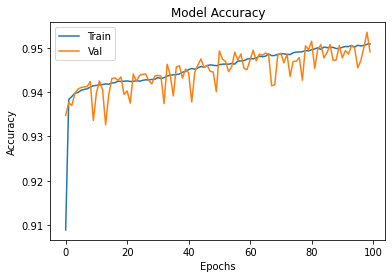

In [33]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

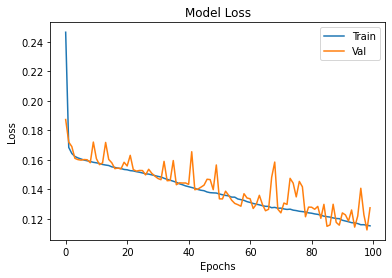

In [34]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase neurons)

In [35]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [36]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [37]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.2021 - accuracy: 0.9281 - val_loss: 0.1633 - val_accuracy: 0.9380
Epoch 2/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1646 - accuracy: 0.9377 - val_loss: 0.1670 - val_accuracy: 0.9374
Epoch 3/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1633 - accuracy: 0.9383 - val_loss: 0.1716 - val_accuracy: 0.9346
Epoch 4/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1624 - accuracy: 0.9386 - val_loss: 0.1620 - val_accuracy: 0.9402
Epoch 5/200
12439/12439 [==============================] - 38s 3ms/step - loss: 0.1620 - accuracy: 0.9387 - val_loss: 0.1612 - val_accuracy: 0.9394
Epoch 6/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1614 - accuracy: 0.9388 - val_loss: 0.1945 - val_accuracy: 0.9270
Epoch 7/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1611 - accuracy: 0.9391 - val_

12439/12439 [==============================] - 38s 3ms/step - loss: 0.1386 - accuracy: 0.9442 - val_loss: 0.1394 - val_accuracy: 0.9426
Epoch 57/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1382 - accuracy: 0.9435 - val_loss: 0.1359 - val_accuracy: 0.9450
Epoch 58/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1371 - accuracy: 0.9438 - val_loss: 0.1372 - val_accuracy: 0.9430
Epoch 59/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1363 - accuracy: 0.9440 - val_loss: 0.1342 - val_accuracy: 0.9433
Epoch 60/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1355 - accuracy: 0.9439 - val_loss: 0.1352 - val_accuracy: 0.9447
Epoch 61/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1347 - accuracy: 0.9438 - val_loss: 0.1305 - val_accuracy: 0.9441
Epoch 62/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1342 - accuracy: 0.9444 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 38s 3ms/step - loss: 0.1030 - accuracy: 0.9538 - val_loss: 0.1025 - val_accuracy: 0.9582
Epoch 112/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1026 - accuracy: 0.9539 - val_loss: 0.0982 - val_accuracy: 0.9545
Epoch 113/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1021 - accuracy: 0.9540 - val_loss: 0.1088 - val_accuracy: 0.9571
Epoch 114/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1020 - accuracy: 0.9538 - val_loss: 0.1138 - val_accuracy: 0.9513
Epoch 115/200
12439/12439 [==============================] - 38s 3ms/step - loss: 0.1014 - accuracy: 0.9545 - val_loss: 0.1291 - val_accuracy: 0.9530
Epoch 116/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1017 - accuracy: 0.9545 - val_loss: 0.0955 - val_accuracy: 0.9590
Epoch 117/200
12439/12439 [==============================] - 39s 3ms/step - loss: 0.1007 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [38]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

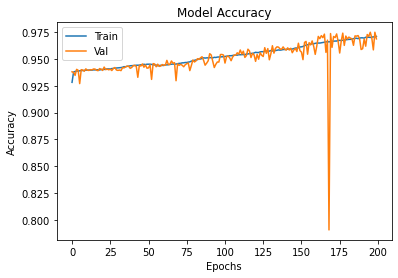

In [39]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

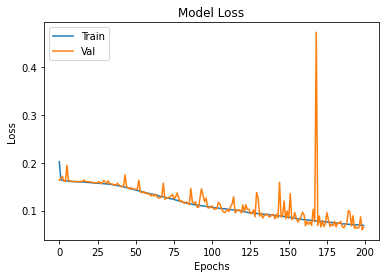

In [40]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layers)

In [41]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dropout(0.5))
model.add(Dense(units = 12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [42]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [43]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 44s 3ms/step - loss: 0.3409 - accuracy: 0.8419 - val_loss: 0.1780 - val_accuracy: 0.9337
Epoch 2/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.2414 - accuracy: 0.8958 - val_loss: 0.1698 - val_accuracy: 0.9332
Epoch 3/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.2294 - accuracy: 0.8996 - val_loss: 0.1707 - val_accuracy: 0.9360
Epoch 4/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.2238 - accuracy: 0.9008 - val_loss: 0.1711 - val_accuracy: 0.9359
Epoch 5/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.2205 - accuracy: 0.9026 - val_loss: 0.1656 - val_accuracy: 0.9356
Epoch 6/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.2182 - accuracy: 0.9026 - val_loss: 0.1649 - val_accuracy: 0.9348
Epoch 7/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.2160 - accuracy: 0.9035 - val_

12439/12439 [==============================] - 43s 3ms/step - loss: 0.1969 - accuracy: 0.9168 - val_loss: 0.1635 - val_accuracy: 0.9379
Epoch 57/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1964 - accuracy: 0.9172 - val_loss: 0.1654 - val_accuracy: 0.9355
Epoch 58/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1958 - accuracy: 0.9172 - val_loss: 0.1642 - val_accuracy: 0.9361
Epoch 59/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1959 - accuracy: 0.9180 - val_loss: 0.1663 - val_accuracy: 0.9437
Epoch 60/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1949 - accuracy: 0.9183 - val_loss: 0.1668 - val_accuracy: 0.9354
Epoch 61/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1954 - accuracy: 0.9180 - val_loss: 0.1634 - val_accuracy: 0.9358
Epoch 62/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1954 - accuracy: 0.9169 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1917 - accuracy: 0.9202 - val_loss: 0.1587 - val_accuracy: 0.9394
Epoch 112/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.1918 - accuracy: 0.9198 - val_loss: 0.1529 - val_accuracy: 0.9434
Epoch 113/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1914 - accuracy: 0.9202 - val_loss: 0.1530 - val_accuracy: 0.9460
Epoch 114/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.1911 - accuracy: 0.9201 - val_loss: 0.1539 - val_accuracy: 0.9452
Epoch 115/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1917 - accuracy: 0.9200 - val_loss: 0.1548 - val_accuracy: 0.9400
Epoch 116/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1923 - accuracy: 0.9197 - val_loss: 0.1546 - val_accuracy: 0.9452
Epoch 117/200
12439/12439 [==============================] - 43s 3ms/step - loss: 0.1917 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [44]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

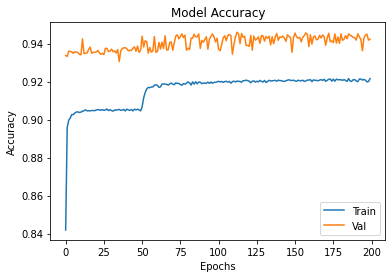

In [45]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

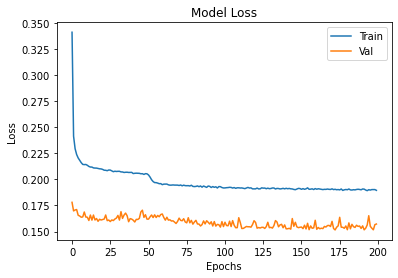

In [46]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Retune Model (use adam optimizer)

In [47]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [48]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [49]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.1792 - accuracy: 0.9335 - val_loss: 0.1699 - val_accuracy: 0.9360
Epoch 2/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.1629 - accuracy: 0.9380 - val_loss: 0.1809 - val_accuracy: 0.9362
Epoch 3/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1605 - accuracy: 0.9390 - val_loss: 0.1591 - val_accuracy: 0.9403
Epoch 4/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1586 - accuracy: 0.9397 - val_loss: 0.1592 - val_accuracy: 0.9406
Epoch 5/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1562 - accuracy: 0.9404 - val_loss: 0.1553 - val_accuracy: 0.9404
Epoch 6/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1541 - accuracy: 0.9409 - val_loss: 0.1561 - val_accuracy: 0.9381
Epoch 7/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1518 - accuracy: 0.9415 - val_

12439/12439 [==============================] - 42s 3ms/step - loss: 0.0806 - accuracy: 0.9657 - val_loss: 0.0766 - val_accuracy: 0.9664
Epoch 57/200
12439/12439 [==============================] - 40s 3ms/step - loss: 0.0797 - accuracy: 0.9662 - val_loss: 0.0920 - val_accuracy: 0.9615
Epoch 58/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0786 - accuracy: 0.9664 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 59/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0778 - accuracy: 0.9668 - val_loss: 0.0789 - val_accuracy: 0.9635
Epoch 60/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0778 - accuracy: 0.9669 - val_loss: 0.0689 - val_accuracy: 0.9690
Epoch 61/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0766 - accuracy: 0.9673 - val_loss: 0.0783 - val_accuracy: 0.9675
Epoch 62/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0767 - accuracy: 0.9676 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0562 - accuracy: 0.9773 - val_loss: 0.0525 - val_accuracy: 0.9794
Epoch 112/200
12439/12439 [==============================] - 42s 3ms/step - loss: 0.0552 - accuracy: 0.9779 - val_loss: 0.0502 - val_accuracy: 0.9831
Epoch 113/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0556 - accuracy: 0.9776 - val_loss: 0.0666 - val_accuracy: 0.9717
Epoch 114/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0555 - accuracy: 0.9776 - val_loss: 0.0498 - val_accuracy: 0.9805
Epoch 115/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0542 - accuracy: 0.9781 - val_loss: 0.0538 - val_accuracy: 0.9801
Epoch 116/200
12439/12439 [==============================] - 40s 3ms/step - loss: 0.0541 - accuracy: 0.9786 - val_loss: 0.0594 - val_accuracy: 0.9733
Epoch 117/200
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0543 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [50]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

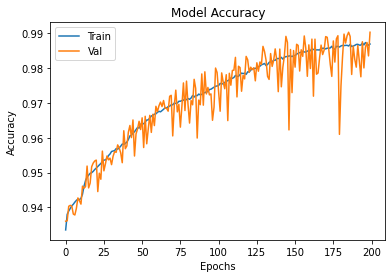

In [51]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

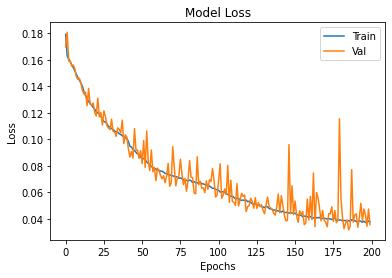

In [52]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (4) Final Model

In [53]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [54]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [55]:
hist = model.fit(
    x_train_s, y_train, epochs = 100,
    validation_data = (x_val_s, y_val)
)

Epoch 1/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1832 - accuracy: 0.9308 - val_loss: 0.1647 - val_accuracy: 0.9384
Epoch 2/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1638 - accuracy: 0.9388 - val_loss: 0.1626 - val_accuracy: 0.9404
Epoch 3/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1605 - accuracy: 0.9393 - val_loss: 0.1595 - val_accuracy: 0.9393
Epoch 4/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1589 - accuracy: 0.9395 - val_loss: 0.1578 - val_accuracy: 0.9398
Epoch 5/100
12439/12439 [==============================] - 40s 3ms/step - loss: 0.1574 - accuracy: 0.9402 - val_loss: 0.1566 - val_accuracy: 0.9398
Epoch 6/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1562 - accuracy: 0.9403 - val_loss: 0.1559 - val_accuracy: 0.9390
Epoch 7/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.1550 - accuracy: 0.9403 - val_

12439/12439 [==============================] - 41s 3ms/step - loss: 0.0868 - accuracy: 0.9640 - val_loss: 0.0917 - val_accuracy: 0.9620
Epoch 57/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0858 - accuracy: 0.9646 - val_loss: 0.0804 - val_accuracy: 0.9656
Epoch 58/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0845 - accuracy: 0.9652 - val_loss: 0.0848 - val_accuracy: 0.9658
Epoch 59/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0837 - accuracy: 0.9656 - val_loss: 0.0862 - val_accuracy: 0.9667
Epoch 60/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0833 - accuracy: 0.9655 - val_loss: 0.0847 - val_accuracy: 0.9670
Epoch 61/100
12439/12439 [==============================] - 42s 3ms/step - loss: 0.0822 - accuracy: 0.9663 - val_loss: 0.0778 - val_accuracy: 0.9705
Epoch 62/100
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0819 - accuracy: 0.9664 - val_loss: 

### Check Model's Accuracy and Loss against Validation Data

In [56]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

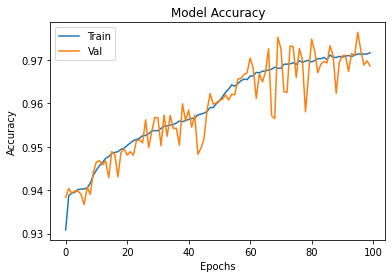

In [57]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

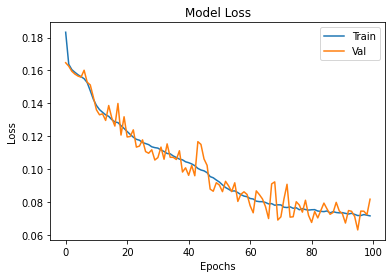

In [58]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Evaluate Accuracy of Data based on Test Data

In [59]:
model.evaluate(x_test_s, y_test)

2666/2666 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9697


[0.08087977766990662, 0.9697399735450745]

In [60]:
# Model Accuracy is 96.97%

### Do Predictions on Test Data

In [69]:
predictions = model.predict(x_test_s)
prediction2 = np.where(predictions>= 0.87, 1,0 )

In [70]:
print(len(predictions))
print(len(x_test_s))

221
221
